In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [58]:
#Cargar dataset
df = pd.read_csv('Datase_ML2.csv', encoding="utf-8")


#analisis de datos
df.info()

df = df.drop('length', axis=1) 



df_isnull = df.isnull()
total_null_values = df_isnull.sum().sum()
print("num de nulos",total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7136 non-null   object 
 1   Resume          7136 non-null   object 
 2   length          2319 non-null   float64
 3   cleaned_Resume  7136 non-null   object 
 4   Common Skills   7136 non-null   object 
dtypes: float64(1), object(4)
memory usage: 278.9+ KB
num de nulos 0


In [59]:
df_with_nulls = df[df.isnull().any(axis=1)]
print(df_with_nulls)
#elimne nulos

Empty DataFrame
Columns: [Category, Resume, cleaned_Resume, Common Skills]
Index: []


In [23]:



# Imprimir el número de columnas
print("Número de columnas:", len(df.columns))

valores_a_conservar = ["Web Developer", "Network Engineer", "Software Tester","UX/UI Designer", "QA Analyst", "Network Administrator",
                        "Software Engineer", "Network Security Specialist","UI Developer", "Data Analyst",'IT Support Specialist','Software Developer','Data Engineer',
                        'Systems Engineer','Database Developer','Systems Analyst','Java Developer','Front-End Engineer','Back-End Developer','Network Technician',
                        'Software Architect','IT Manager','Web Designer','SEO Specialist','Data Scientist','SEO Analyst','Network Analyst'
                        ]

# eliminar filas que no contengan los valores a conservar                        
df = df[df["Job Title"].isin(valores_a_conservar)]

Número de columnas: 6


In [48]:
#reducir las etiquetas a 11000
def sample_n(df, n=11000):
    return df.sample(min(len(df), n))

df = df.groupby('Job Title').apply(sample_n).reset_index(drop=True)

KeyError: 'Job Title'

In [60]:
#numero de filas despues de eliminar
numero_filas = len(df)
print(f"Número de filas: {numero_filas}")

#dataset depues de elimnar datos no necesarios
df.info()

#Nombre del nuevo archivo
df.to_csv("archivo_filtrado.csv", index=False)

Número de filas: 7136
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        7136 non-null   object
 1   Resume          7136 non-null   object
 2   cleaned_Resume  7136 non-null   object
 3   Common Skills   7136 non-null   object
dtypes: object(4)
memory usage: 223.1+ KB


In [61]:
# Seleccionar la columna
columna = df["cleaned_Resume"]



# Contar valores únicos de Job title
jobTitle_valores_unicos = columna.unique().shape[0]



# Imprimir el resultado de job title
print(f"Número de valores únicos en la columna 'Job Title': {jobTitle_valores_unicos}")



Número de valores únicos en la columna 'Job Title': 2006


In [3]:
# Se redujo el dataset de  1615940 filas y 23 columnas a 331035 filas y 6 columnas
#Cargar dataset
data = pd.read_csv('archivo_filtrado.csv', encoding="utf-8")

data.describe()
data.nunique()



Qualifications             10
Job Title                  27
Role                       66
Job Description            66
skills                     66
Responsibilities           66
length Job Description     55
length Responsabilities    44
length skills              53
dtype: int64

In [28]:
df['length cleaned_Resume'] = df['cleaned_Resume'].str.len()
df['length cleaned_Resume'].describe()



count     7136.000000
mean      3339.826513
std       3259.928863
min        163.000000
25%       1493.000000
50%       2426.500000
75%       4173.000000
max      29612.000000
Name: length cleaned_Resume, dtype: float64

In [29]:
data['length Responsabilities'] = data['Responsibilities'].str.len()
data['length Responsabilities'].describe()

NameError: name 'data' is not defined

In [30]:
df['length Skills'] = df['Common Skills'].str.len()
df['length Skills'].describe()

count    7136.000000
mean      205.462724
std        28.772900
min       167.000000
25%       186.000000
50%       195.000000
75%       219.000000
max       286.000000
Name: length Skills, dtype: float64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_1684\2004674791.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length Skills']).set_title('cleaned_Resume length distribution')


Text(0.5, 1.0, 'cleaned_Resume length distribution')

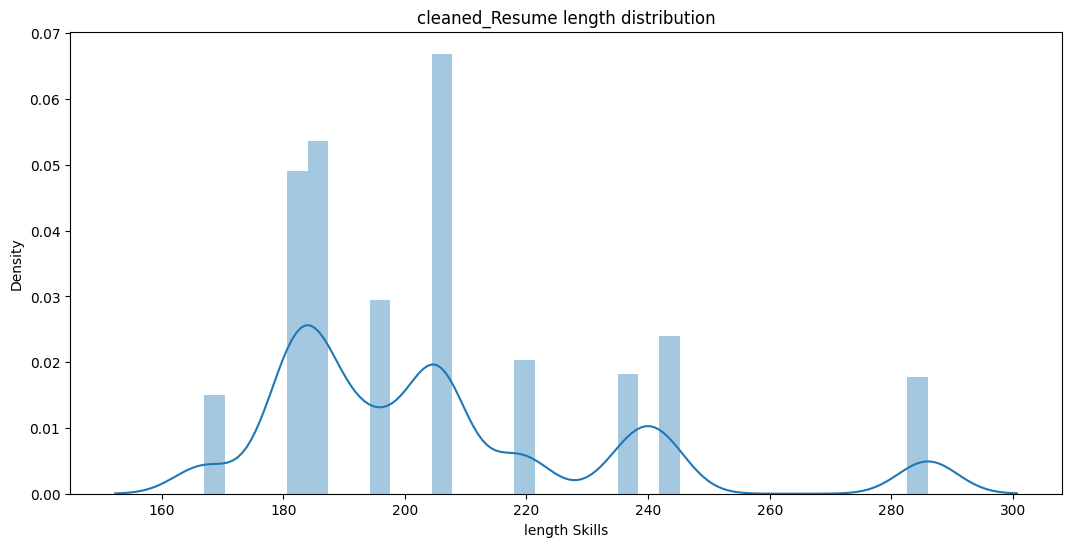

In [34]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length cleaned_Resume']).set_title('cleaned_Resume length distribution')

C:\Users\pepeh\AppData\Local\Temp\ipykernel_26176\3550602166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length Responsabilities']).set_title('Responsabilities length distribution')


Text(0.5, 1.0, 'Responsabilities length distribution')

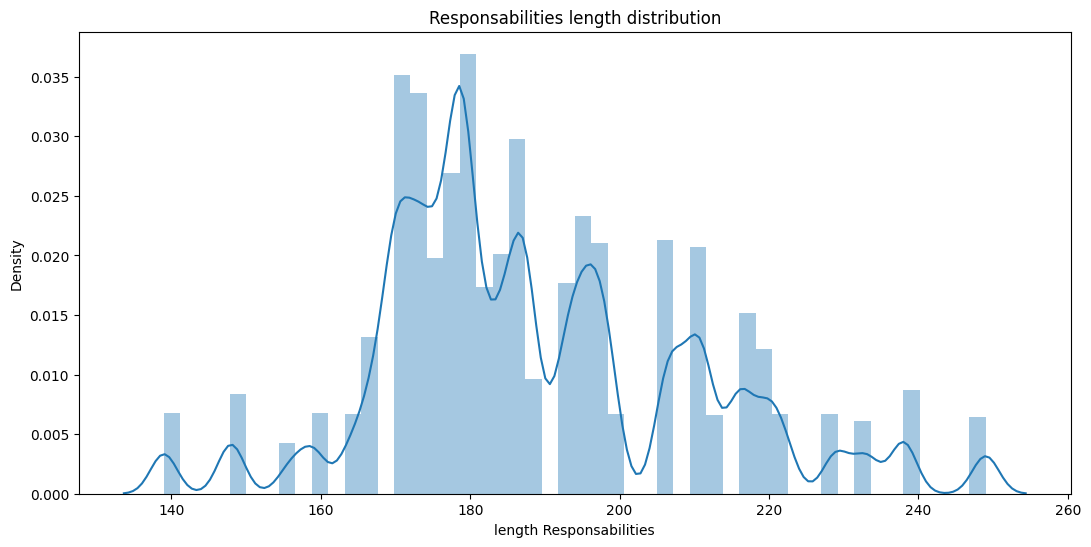

In [8]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length Responsabilities']).set_title('Responsabilities length distribution')

C:\Users\pepeh\AppData\Local\Temp\ipykernel_26176\3200318755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length skills']).set_title('skills length distribution')


Text(0.5, 1.0, 'skills length distribution')

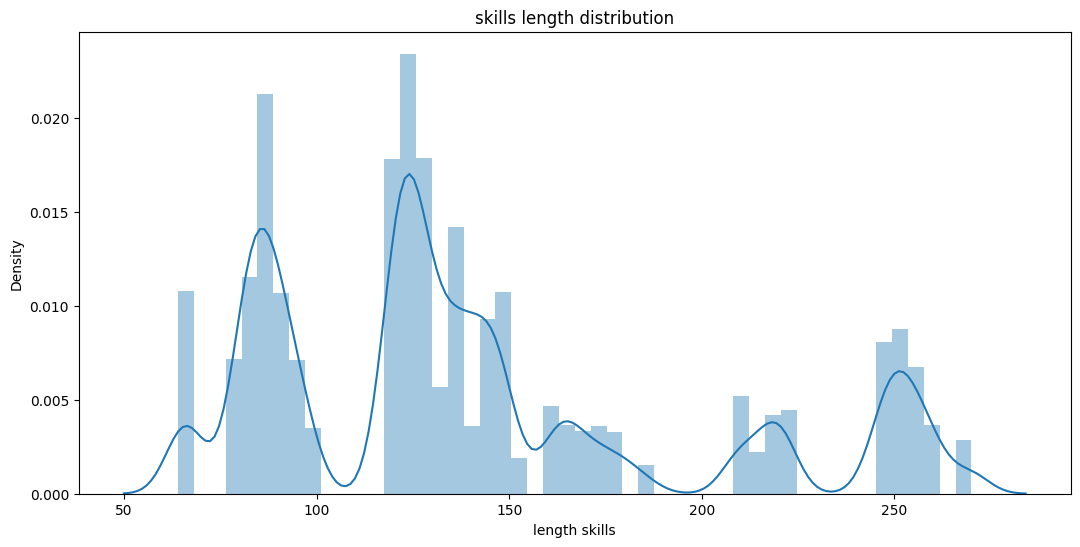

In [9]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['length skills']).set_title('skills length distribution')

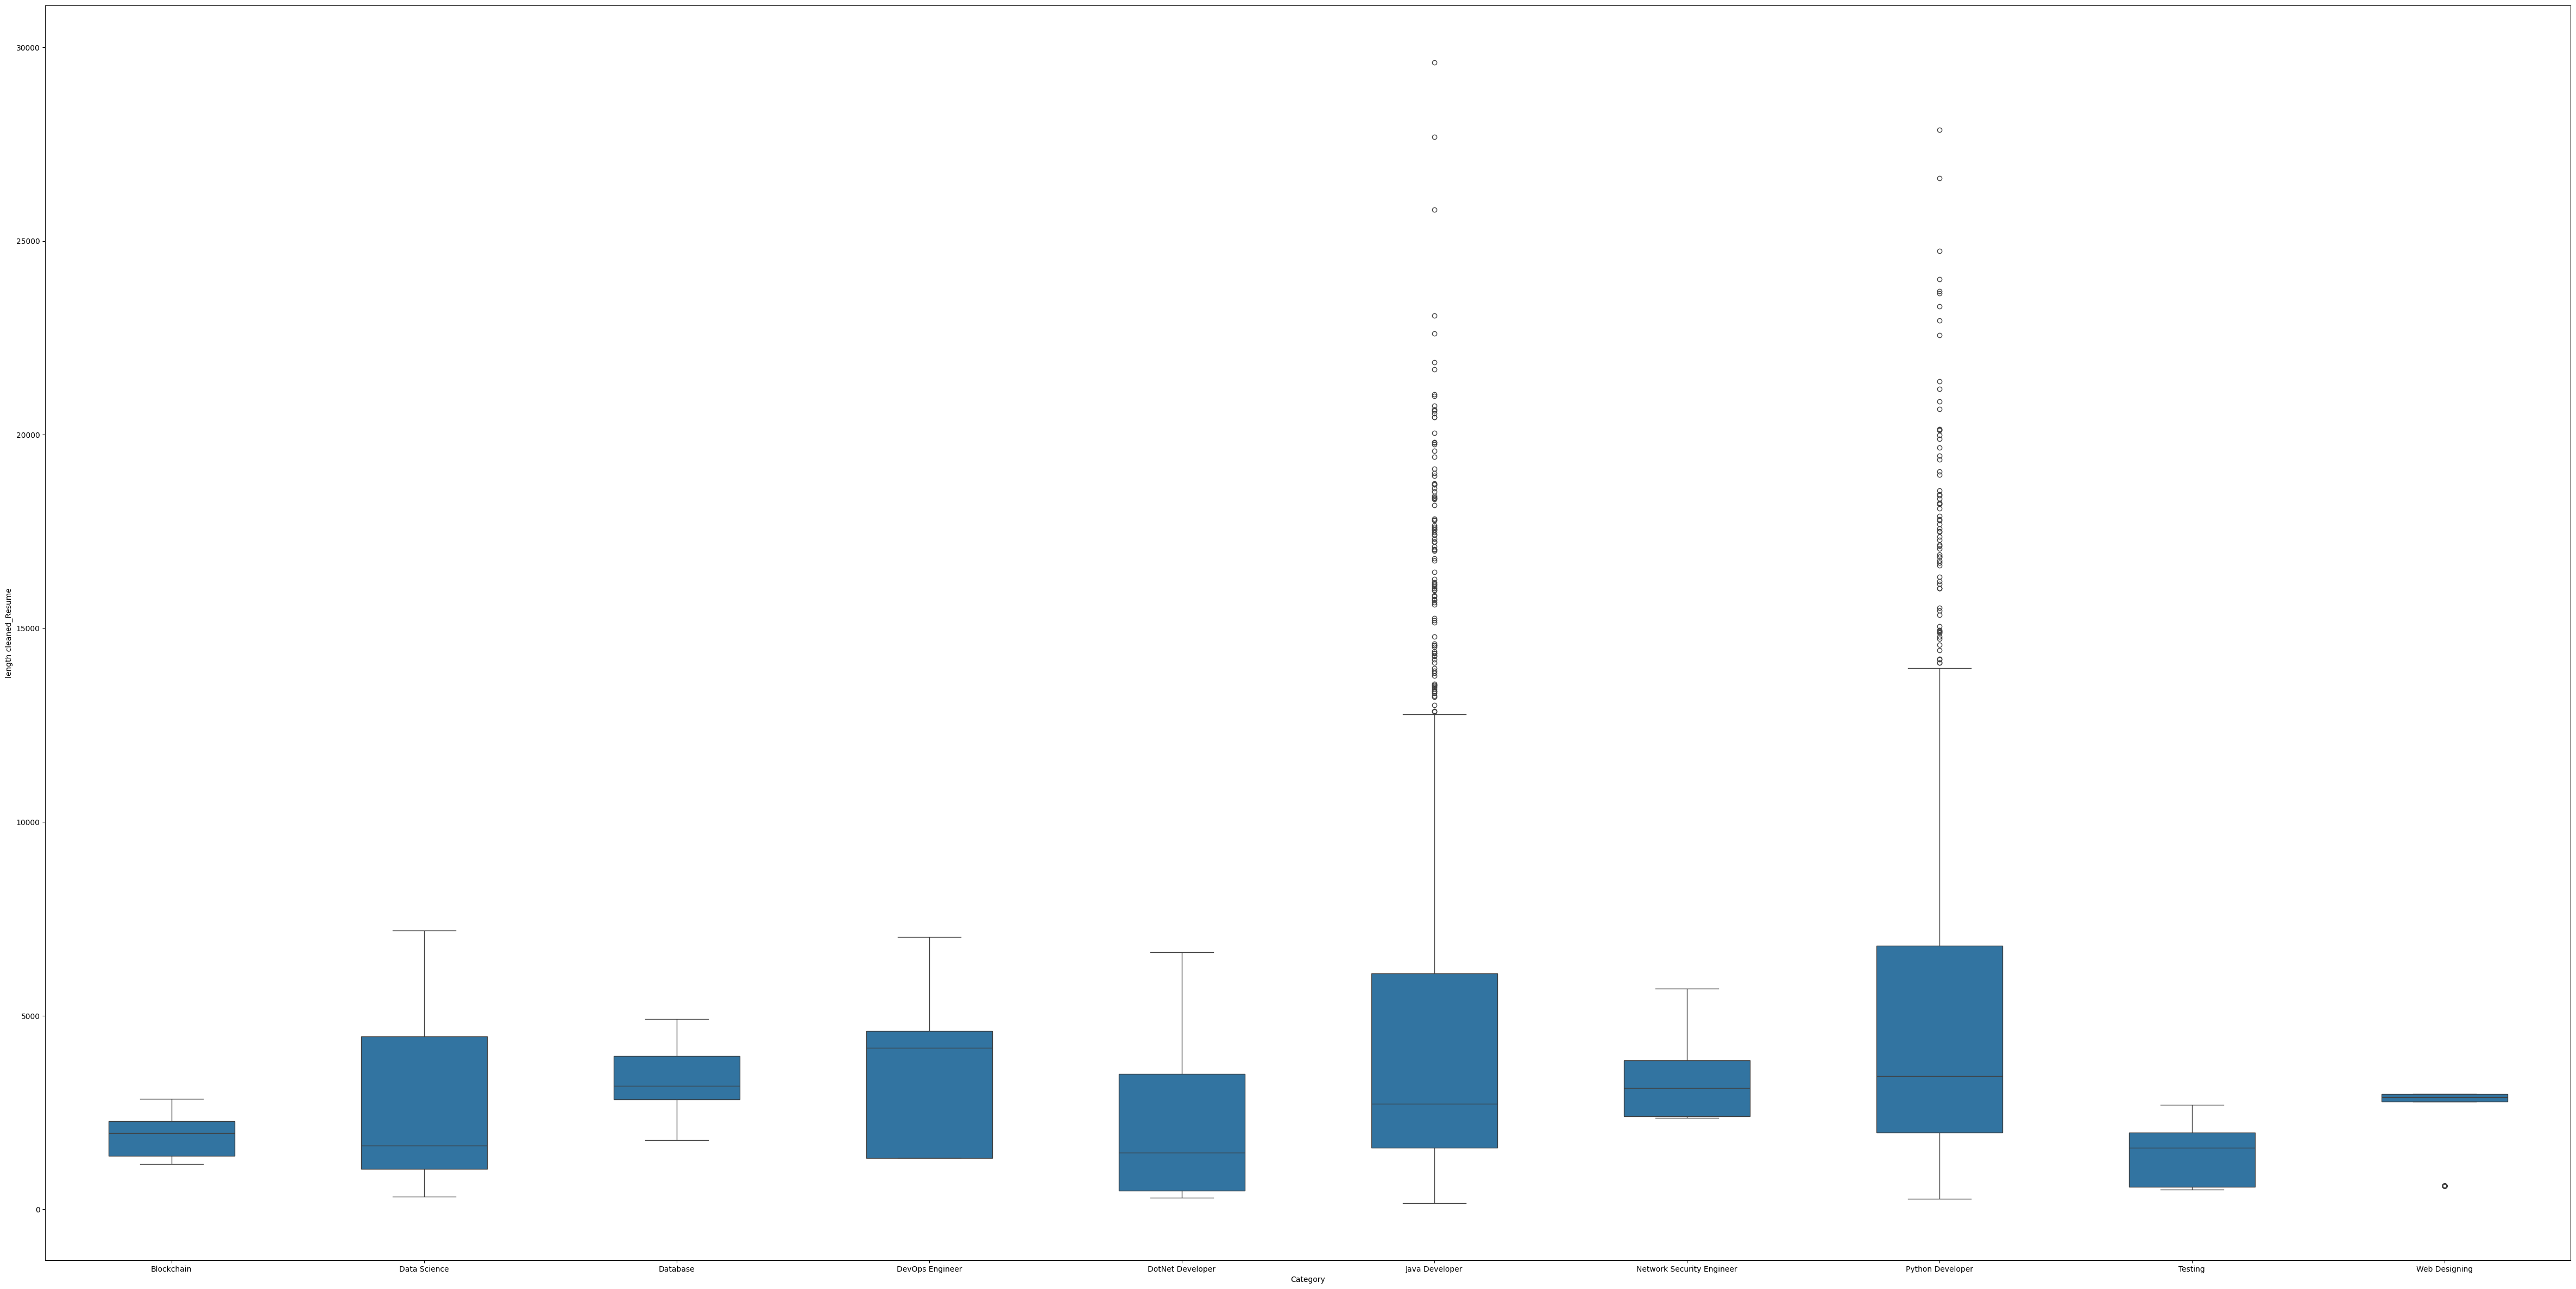

In [36]:
plt.figure(figsize=(60,30))
sns.boxplot(data=df, x='Category', y='length cleaned_Resume', width=.5);

In [37]:
df['Category'].value_counts()

Category
Java Developer               1300
Python Developer             1298
Testing                      1190
DevOps Engineer               715
Blockchain                    580
Web Designing                 495
Data Science                  440
Database                      429
DotNet Developer              364
Network Security Engineer     325
Name: count, dtype: int64

C:\Users\pepeh\AppData\Local\Temp\ipykernel_1684\2955146718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, palette='Reds')


<Axes: xlabel='count', ylabel='Category'>

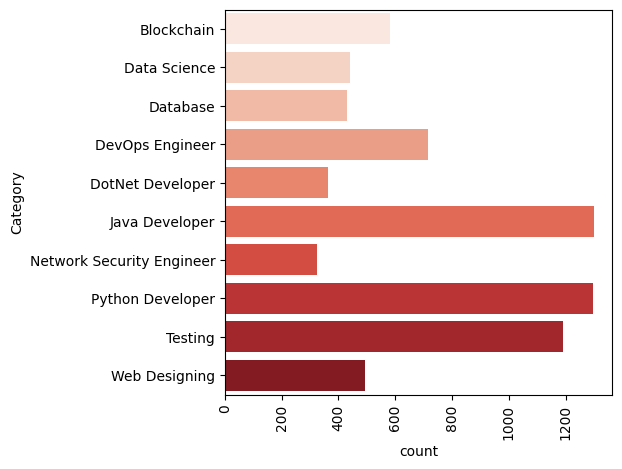

In [62]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [63]:

df['Category'].value_counts()[:3].index
# Contar los textos únicos en la columna "Texto"
numero_textos_unicos = df['cleaned_Resume'].nunique()

# Imprimir el número de textos únicos
print(f"Número de textos únicos: {numero_textos_unicos}")

Número de textos únicos: 2006


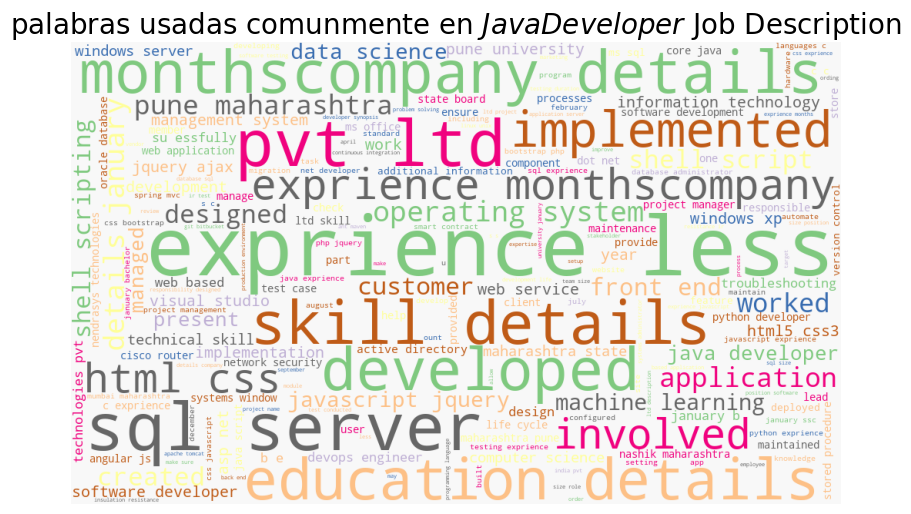

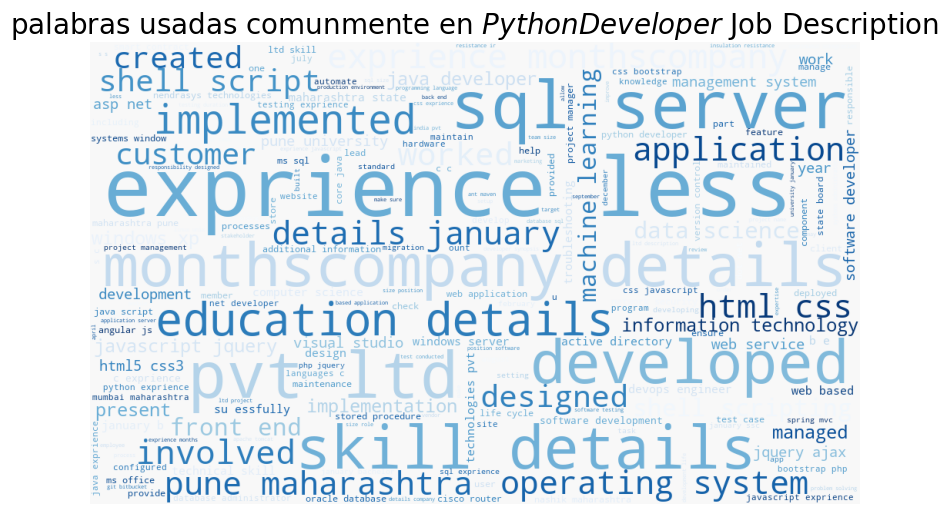

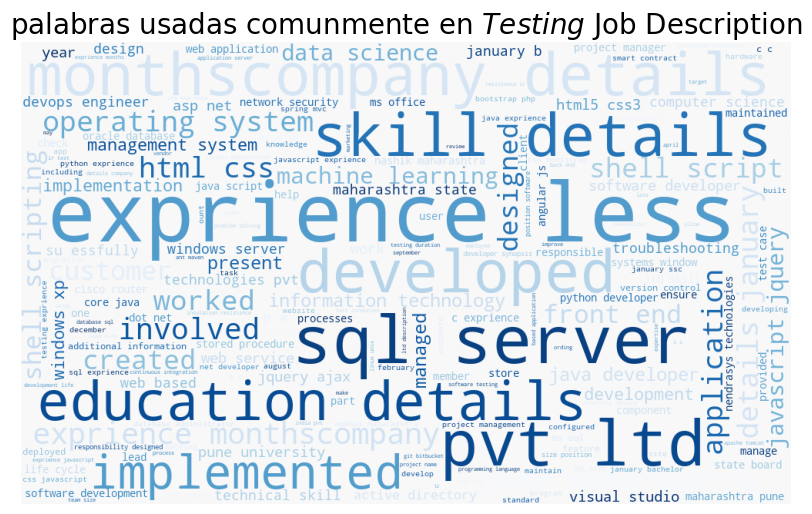

In [53]:
labels = [
    "Blockchain",
    "Data Science",
    "Database",
    "DevOps Engineer",
    "DotNet Developer",
    "Java Developer",
    "Network Security Engineer",
    "Python Developer",
    "Testing",
    "Web Designing"
]

a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Job Description", size=20)
    plt.show()

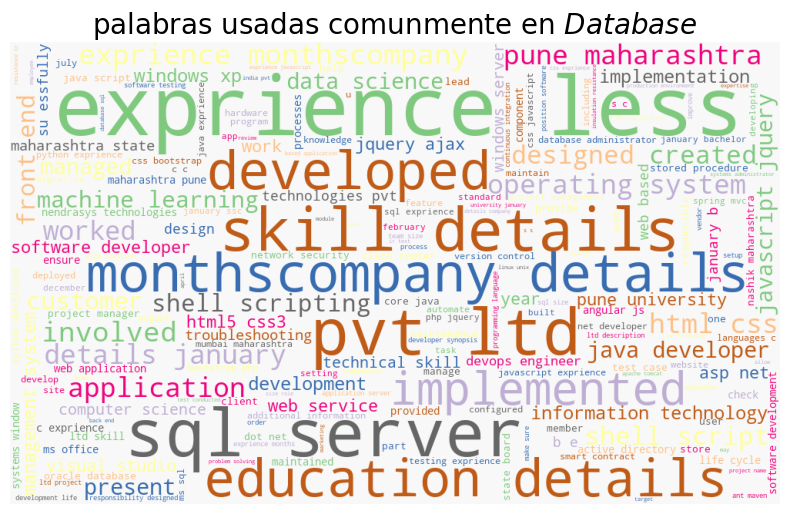

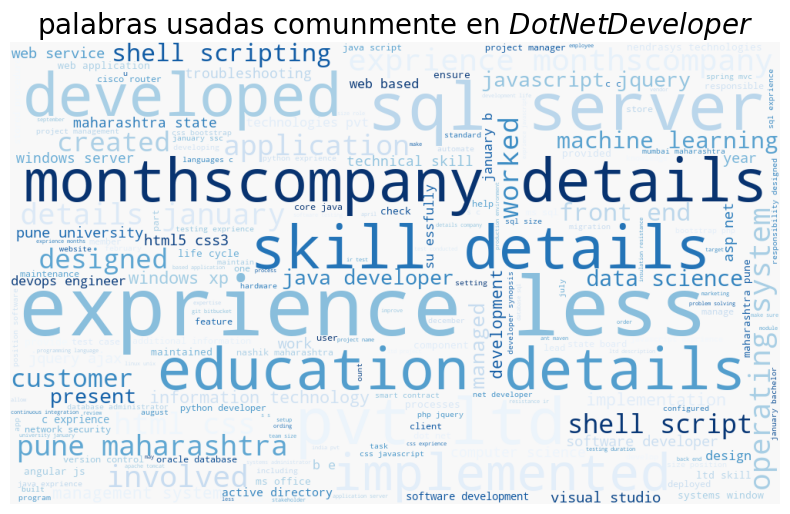

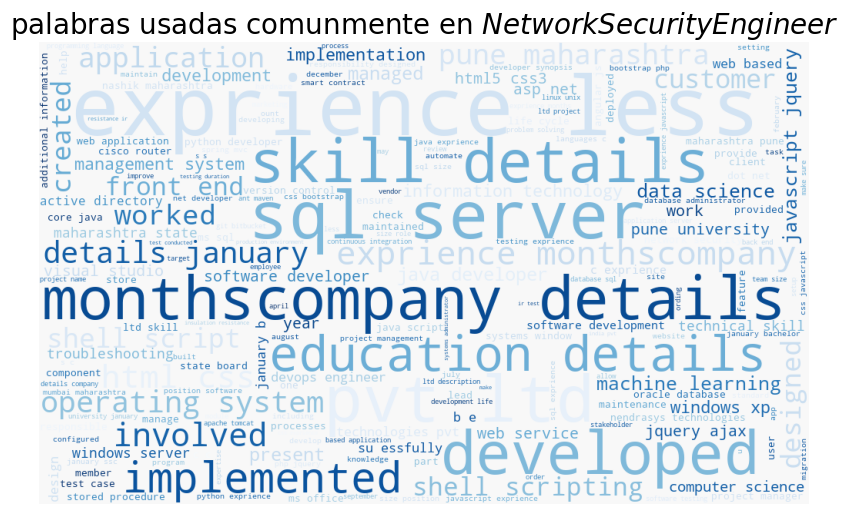

In [64]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$", size=20)
    plt.show()

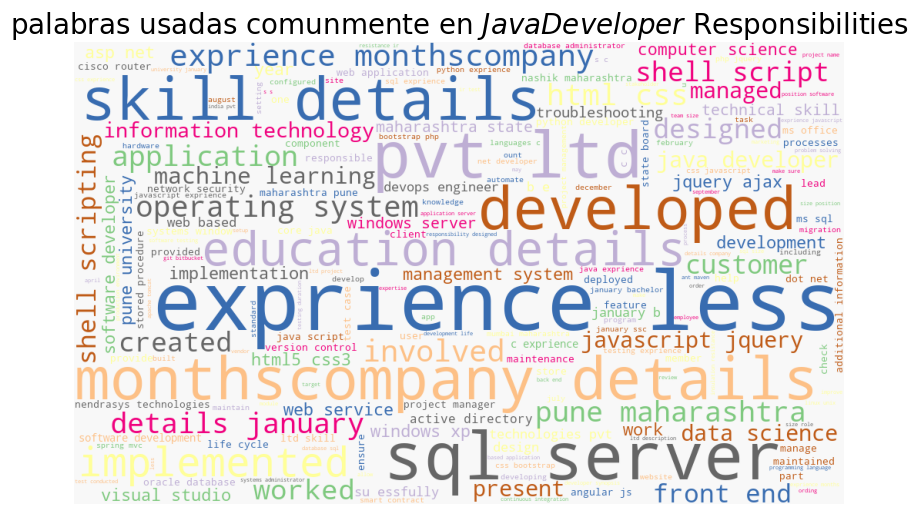

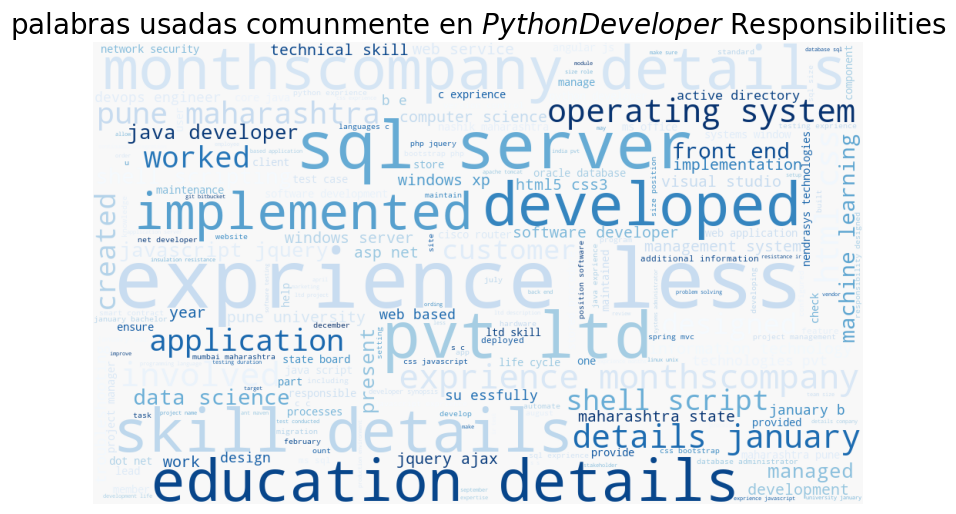

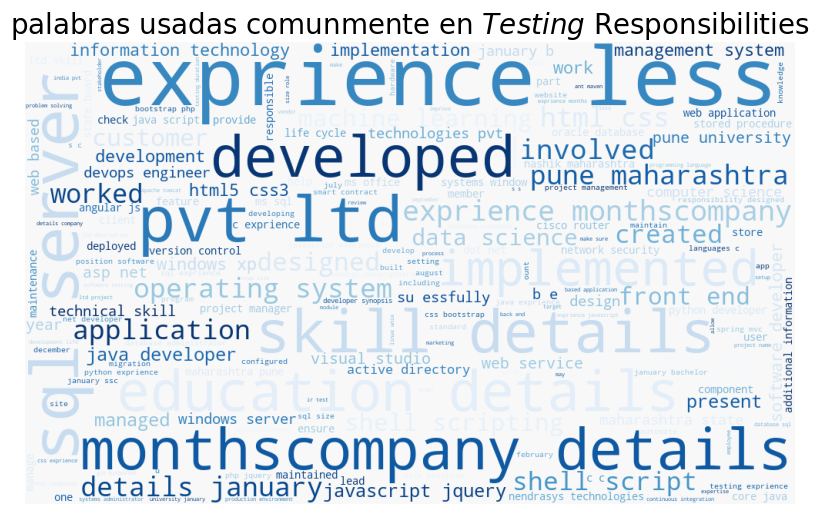

In [43]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()

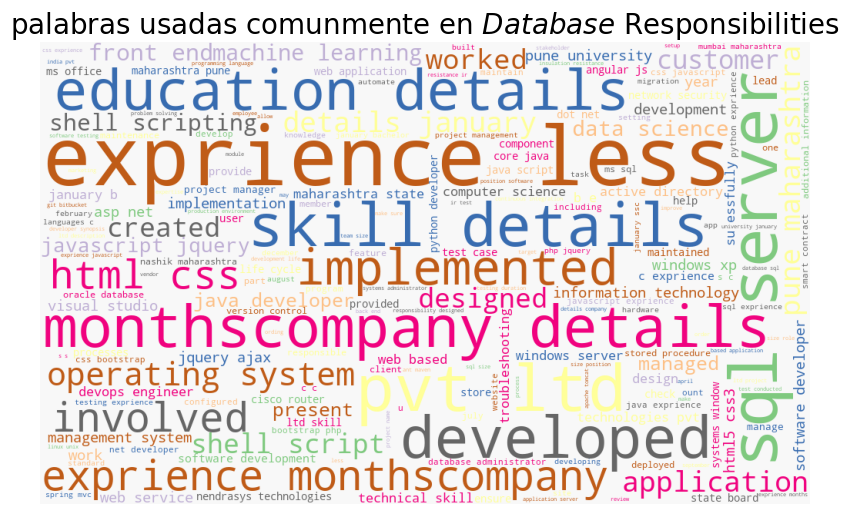

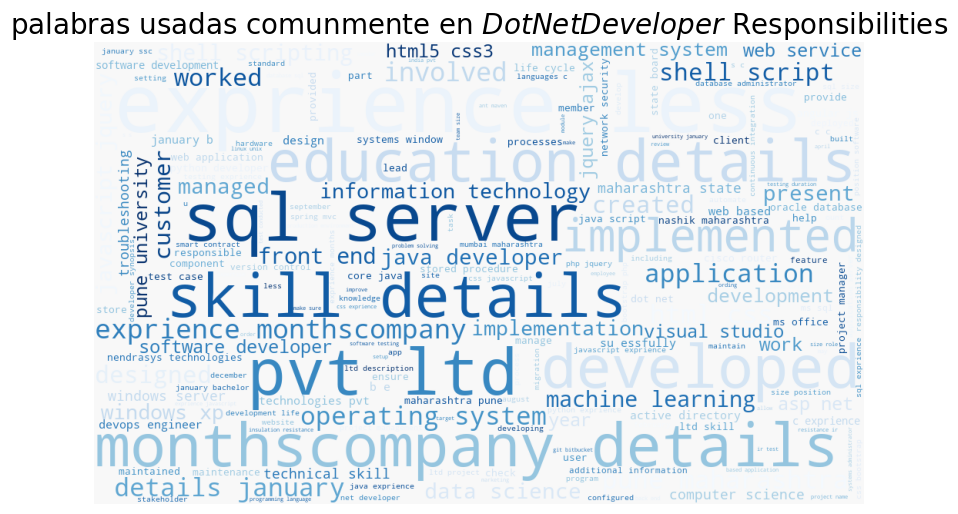

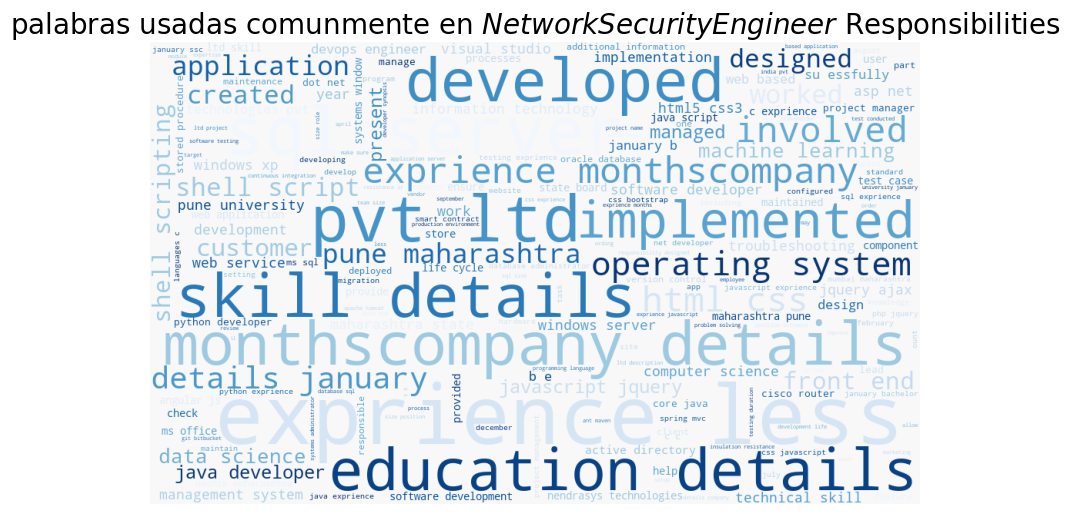

In [44]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df[df["Category"].isin(labels)]["cleaned_Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"palabras usadas comunmente en ${label}$ Responsibilities", size=20)
    plt.show()
    

In [35]:
data.to_csv("archivo_filtrado.csv", index=False)


data

Qualifications           Job Title                    Role  \
0                 MBA  Back-End Developer           API Developer   
1                 MCA  Back-End Developer           API Developer   
2                  BA  Back-End Developer        Server Developer   
3              B.Tech  Back-End Developer        Server Developer   
4              B.Tech  Back-End Developer           API Developer   
...               ...                 ...                     ...   
237602         M.Tech       Web Developer    Full-Stack Developer   
237603         M.Tech       Web Developer    Full-Stack Developer   
237604            BCA       Web Developer   Backend Web Developer   
237605         B.Tech       Web Developer   Backend Web Developer   
237606            BCA       Web Developer  Frontend Web Developer   

                                          Job Description  \
0       An API Developer creates and maintains applica...   
1       An API Developer creates and maintains applica...   
2       A Server Developer specializes in developing a...   
3       A Server Developer specializes in developing a...   
4       An API Developer creates and maintains applica...   
...                                                   ...   
237602  Full-Stack Developers are skilled in both fron...   
237603  Full-Stack Developers are skilled in both fron...   
237604  Backend Web Developers build and maintain the ...   
237605  Backend Web Developers build and maintain the ...   
237606  Frontend Web Developers design and implement u...   

                                                   skills  \
0       API design and development RESTful API knowled...   
1       API design and development RESTful API knowled...   
2       Server-side programming languages (e.g., Java,...   
3       Server-side programming languages (e.g., Java,...   
4       API design and development RESTful API knowled...   
...                                                   ...   
237602  Frontend and backend development Database inte...   
237603  Frontend and backend development Database inte...   
237604  Server-side programming (e.g., Node.js, Python...   
237605  Server-side programming (e.g., Node.js, Python...   
237606  HTML, CSS, JavaScript Frontend frameworks (e.g...   

                                         Responsibilities  \
0       Design and implement APIs (Application Program...   
1       Design and implement APIs (Application Program...   
2       Develop and maintain server-side logic and dat...   
3       Develop and maintain server-side logic and dat...   
4       Design and implement APIs (Application Program...   
...                                                   ...   
237602  Work on both frontend and backend aspects, cre...   
237603  Work on both frontend and backend aspects, cre...   
237604  Develop server-side logic and databases to sup...   
237605  Develop server-side logic and databases to sup...   
237606  Design and code user interfaces for websites, ...   

        length Job Description  length Responsabilities  length skills  
0                          158                      199             80  
1                          158                      199             80  
2                          159                      187             90  
3                          159                      187             90  
4                          158                      199             80  
...                        ...                      ...            ...  
237602                     248                      175             83  
237603                     248                      175             83  
237604                     221                      175             88  
237605                     221                      175             88  
237606                     231                      220             85  

[237607 rows x 9 columns]